In [1]:

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
%matplotlib inline
import matplotlib; matplotlib.rcParams['savefig.dpi'] = 144

In [2]:
heart = pd.read_csv('c:/users/user/codergirl/datasets/heart.csv')

In [5]:
heart.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
5,57,1,0,140,192,0,1,148,0,0.4,1,0,1,1
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2,1
7,44,1,1,120,263,0,1,173,0,0.0,2,0,3,1
8,52,1,2,172,199,1,1,162,0,0.5,2,0,3,1
9,57,1,2,150,168,0,1,174,0,1.6,2,0,2,1


In [7]:
heart.tail(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
293,67,1,2,152,212,0,0,150,0,0.8,1,0,3,0
294,44,1,0,120,169,0,1,144,1,2.8,0,0,1,0
295,63,1,0,140,187,0,0,144,1,4.0,2,2,3,0
296,63,0,0,124,197,0,1,136,1,0.0,1,0,2,0
297,59,1,0,164,176,1,0,90,0,1.0,1,2,1,0
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [4]:
heart.shape[0]

303

In [5]:
heart.dtypes

age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
ca            int64
thal          int64
target        int64
dtype: object

In [12]:
heart.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [19]:
#mean age of males and females, 0=female, 1=male
#round(heart[heart['sex']== 1].age.mean())

heart[['age','sex']].groupby(by='sex').mean()



,age
sex,
0,55.677083
1,53.758454


In [8]:
#pie chart presenting the male/female proportion
males = (heart['sex'] == 1).sum()
females = (heart['sex'] == 0).sum()

# put them into a list called proportions
proportions = [males, females]

proportions

[207, 96]

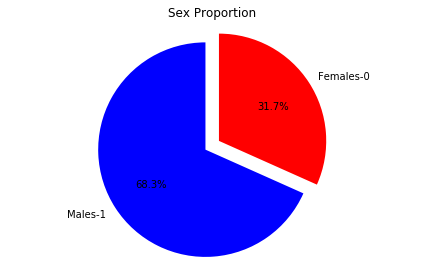

In [35]:
# Create a pie chart of genders
plt.pie(
    # using proportions
    proportions,
    
    # with the labels
    labels = ['Males-1', 'Females-0'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Sex Proportion")

# View the plot
plt.tight_layout()
plt.show()

In [10]:
#make pie chart of target 0=heart disease, 1= no heart disease
heartdisease = (heart['target'] == 0).sum()
noheartdisease = (heart['target'] == 1).sum()

# put them into a list called disease_proportions
disease_proportions = [heartdisease, noheartdisease]

disease_proportions

[138, 165]

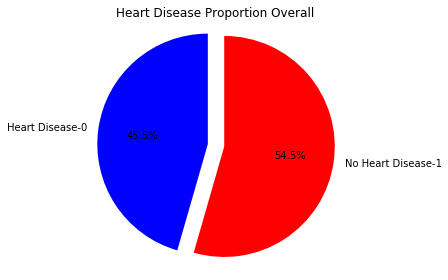

In [11]:
# Create a pie chart of heart disease proportions
plt.pie(
    # using disease_proportions
    disease_proportions,
    
    # with the labels
    labels = ['Heart Disease-0', 'No Heart Disease-1'],
    
    # with no shadows
    shadow = False,
    
    # with colors
    colors = ['blue','red'],
    
    # with one slide exploded out
    explode = (0.15 , 0),
    
    # with the start angle at 90%
    startangle = 90,
    
    # with the percent listed as a fraction
    autopct = '%1.1f%%'
    )

# View the plot drop above
plt.axis('equal')

# Set labels
plt.title("Heart Disease Proportion Overall")

# View the plot
plt.tight_layout()
plt.show()

In [58]:
#sex by target of heart disease, where sex 0=female, 1=male, and target 0 = heart disease, 1 = no heart disease
#heart[['sex','target']].groupby('sex').sum()
#above line outputs the sum of the 1's in target, which is no heart disease.  
#Number of females with heart disease:
#femaleheartdisease = 

heart_count = pd.crosstab(heart.sex, heart.target, margins=True, margins_name='Total')#.reset_index()
#heart_count.columns = ['sex','disease','no disease','total count']
# look up rename  heart_count.rename(columns = {'0':'x','1':'y'})

target,0,1,Total
sex,,,
0,24,72,96
1,114,93,207
Total,138,165,303


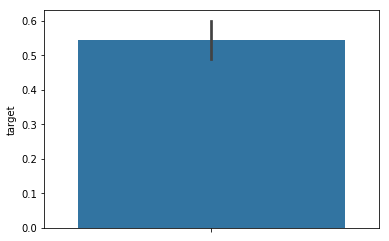

In [47]:

sns.barplot(data=heart,y='target',hue='sex')

In [10]:
#create barchart of target vs gender
df = heart.target.sort_values(ascending = False)#[1:6]
df

# create bins interval using numpy
binsVal = np.arange(0,350,10)
binsVal

array([  0,  10,  20,  30,  40,  50,  60,  70,  80,  90, 100, 110, 120,
       130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250,
       260, 270, 280, 290, 300, 310, 320, 330, 340])

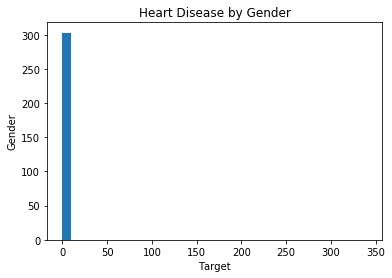

In [11]:
# create the histogram
plt.hist(df, bins = binsVal)

# Set the title and labels
plt.xlabel('Target')
plt.ylabel('Gender')
plt.title('Heart Disease by Gender')

# show the plot
plt.show()